In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
data = pd.read_csv('AluminiumDataset.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [4]:
data.head(10)

,Price
Month,
1998-01-05,55096.35
1998-01-06,55227.92
1998-01-07,55655.09
1998-01-08,56027.24
1998-01-09,57074.54
1998-01-10,55220.42
1998-01-11,54876.71
1998-01-12,53152.61
1999-01-01,51794.30


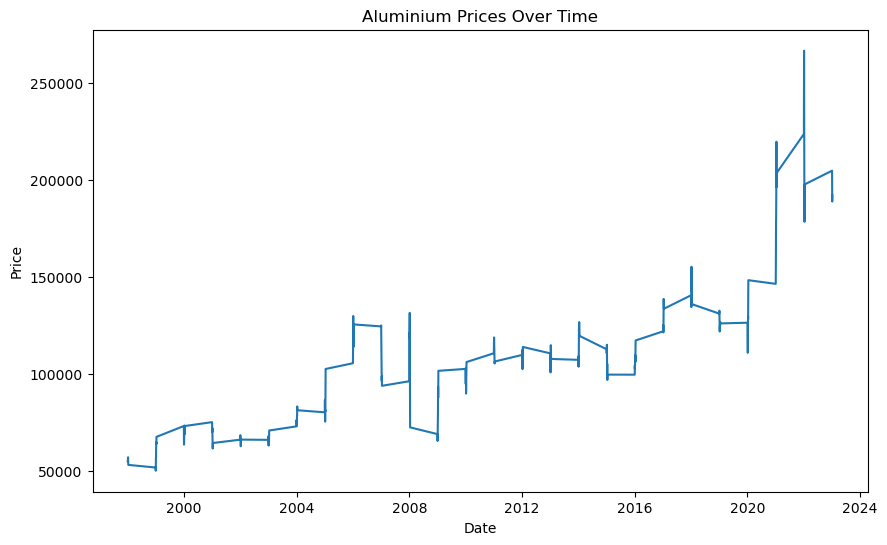

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Aluminium Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [24]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

C:\Users\Aiman Gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aiman Gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
predictions = model_fit.predict(start=train_size, end=len(data)-1)

C:\Users\Aiman Gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


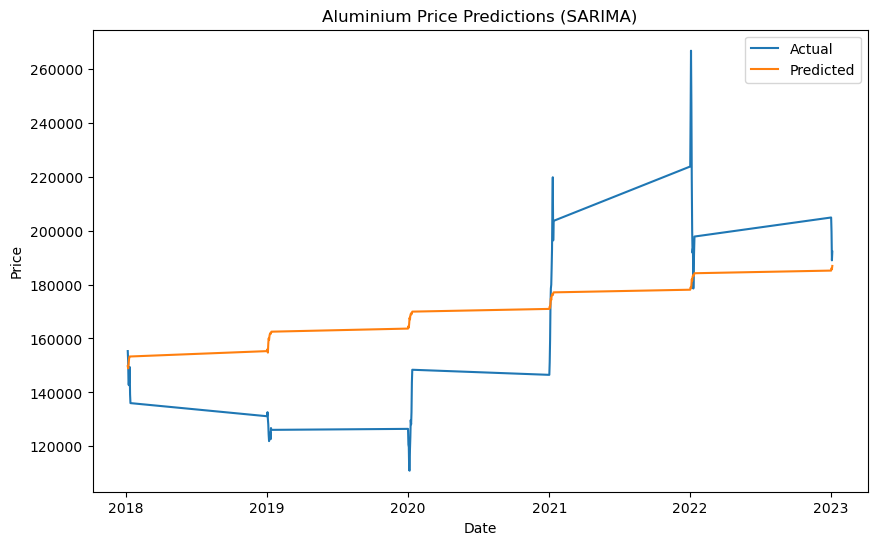

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('Aluminium Price Predictions (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
future_periods = (2050 - data.index[-1].year) * 12  
forecast = model_fit.get_forecast(steps=future_periods)

C:\Users\Aiman Gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [29]:
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=future_periods, freq='M')

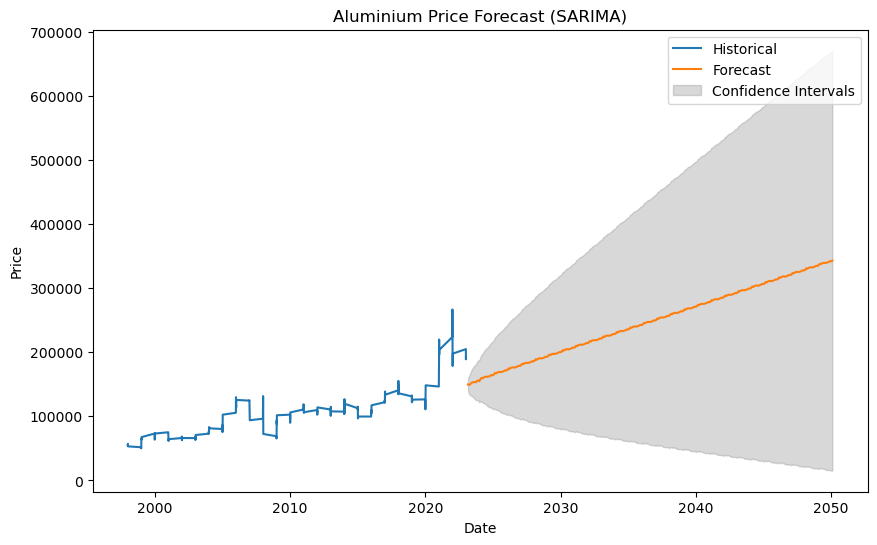

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(
    forecast_index,
    confidence_intervals['lower Price'],
    confidence_intervals['upper Price'],
    color='gray',
    alpha=0.3,
    label='Confidence Intervals'
)
plt.title('Aluminium Price Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()